# <span style="color:orange"> Quantitative Comparison of Dipole Inversions algorithms // *For SC QSM* </span> </br>
This notebook uses masks and a ground truth chi map with STD in SC GM and WM to compare the accuracy of different DI algorithms developed for Brain QSM, this algorithms are mostly implemented in Sepia Toolbox: </br>
https://sepia-documentation.readthedocs.io/en/latest/index.html </br>

We will load the ground truth chimap, extract metrics and compare the offset of white matter and gray matter </br>

In the chimap, higher value relates to paramagnetic reaction to the magnetic field B0 whereas diamagnetic materials will show lower values on the map. </br>

Remember that this depends on the sign convention. We are using the rotating MR frame of reference where paramagnetic materials will show as positive and diamagnetic as negative.</br>

We have to offset the absolute chimap by the average of the Spinal Cord mask as SEPIA does this with the mask too! 



In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from utils.extract_metric import extract_metrics

In [2]:
import utils.qsm_testing_display_slices
import importlib
importlib.reload(utils.qsm_testing_display_slices)

<module 'utils.qsm_testing_display_slices' from 'c:\\Users\\Admin\\Documents\\msc_project\\Image-processing-strategies\\qsm_testing\\utils\\qsm_testing_display_slices.py'>

## <span style="color:#EF9A9A"> Chi maps from the simulation after QSM pipeline</span> </br>
This use a Local Field calculated with:  </br>
Paramaters: 

In [4]:
# Load the mask data for metric auto-calculation with image
wm_mask_path = r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\masks/sc_wm_crop.nii.gz"
gm_mask_path = r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\masks\sc_gm_crop.nii.gz"

In [5]:
gm_mask_data = nib.load(gm_mask_path).get_fdata()
wm_mask_data = nib.load(wm_mask_path).get_fdata()

In [6]:
gt_sus_map_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\ground_truth_data\gt_ref_avg_sc_gauss_chi_dist_crop.nii.gz").get_fdata()

### <span style="color:#B4A8D5"> Ground truth Chi map </span> </br>

In [9]:
sc_mask_data = nib.load(r"E:\msc_data\sc_qsm\new_gauss_sims\mrsim_outpus/cord_mask_crop.nii.gz").get_fdata()

chimap_avg_sc_min = np.min(gt_sus_map_data[sc_mask_data==1])
chimap_avg_sc_max = np.max(gt_sus_map_data[sc_mask_data==1])
print("Chimap min: ", chimap_avg_sc_min)
print("Chimap max: ", chimap_avg_sc_max)

Chimap min:  -0.08023667813293578
Chimap max:  0.10944482193601957


In [ ]:
# Where the min is located:
#chimap_ref_sc_avg_min_loc = np.unravel_index(np.argmin(chimap_ref_sc_avg_), chimap_ref_sc_avg_.shape)
#print("Chimap min loc: ", chimap_ref_sc_avg_min_loc)

Chimap min loc:  (np.int64(156), np.int64(152), np.int64(30))


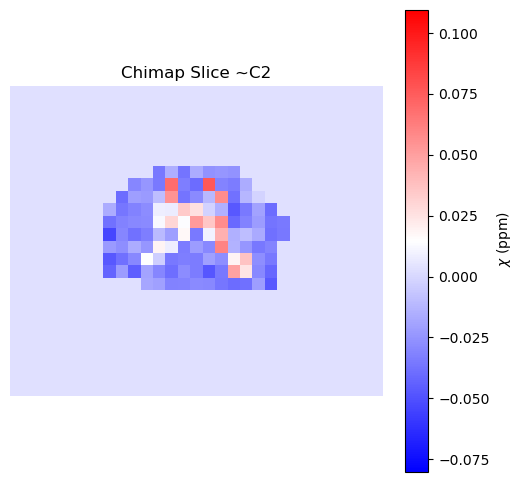

GM Mean: 0.0232 ppm
WM Mean: -0.0296 ppm


In [10]:
utils.qsm_testing_display_slices.display_qsm_slice(gt_sus_map_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

### <span style="color:#29B6F6"> TKD Results </span> </br>

In [11]:
initial_tkd_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_TKD\RMSE_in_gt_lf_tst1\tkd_run0\Sepia_Chimap.nii.gz").get_fdata()
best_tkd_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_TKD\RMSE_in_gt_lf_tst1\tkd_run387\Sepia_Chimap.nii.gz").get_fdata()

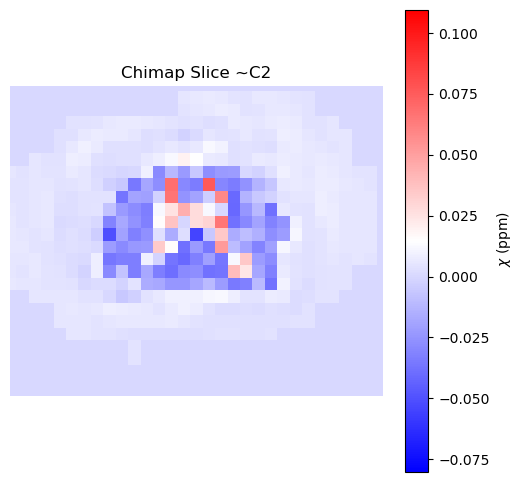

GM Mean: 0.0224 ppm
WM Mean: -0.0238 ppm


In [12]:
utils.qsm_testing_display_slices.display_qsm_slice(initial_tkd_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

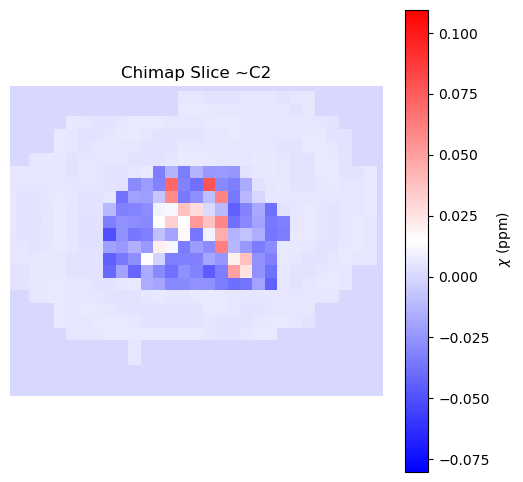

GM Mean: 0.0255 ppm
WM Mean: -0.0265 ppm


In [13]:
utils.qsm_testing_display_slices.display_qsm_slice(best_tkd_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

### <span style="color:#9EC771"> Closed-form Solution Results </span> </br>

In [14]:
initial_closed_form_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_closed_form\RMSE_in_gt_lf_tst1\closed_form_run0\Sepia_Chimap.nii.gz").get_fdata()
best__closed_form_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_closed_form\RMSE_in_gt_lf_tst1\closed_form_run182\Sepia_Chimap.nii.gz").get_fdata()

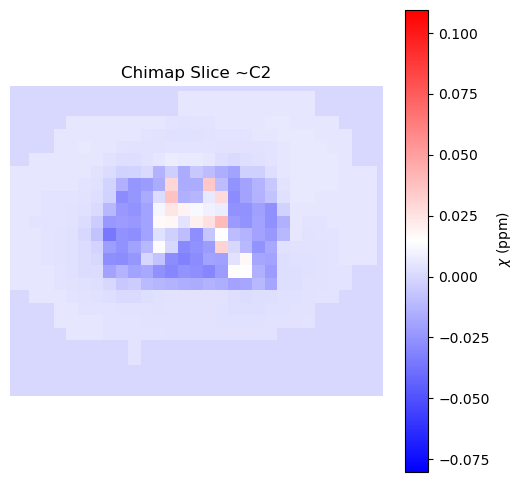

GM Mean: 0.0128 ppm
WM Mean: -0.0168 ppm


In [15]:
utils.qsm_testing_display_slices.display_qsm_slice(initial_closed_form_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

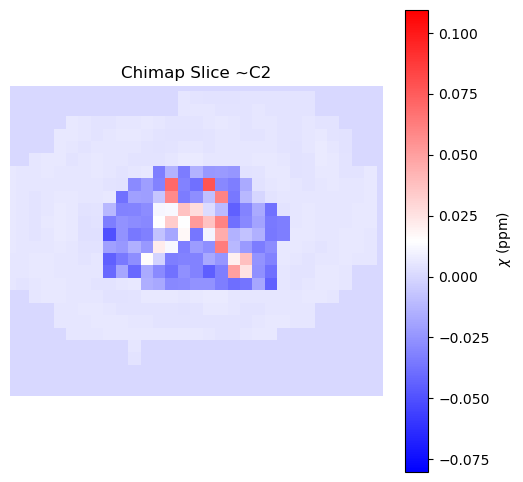

GM Mean: 0.0255 ppm
WM Mean: -0.0262 ppm


In [16]:
utils.qsm_testing_display_slices.display_qsm_slice(best__closed_form_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

In [46]:
# Comparing RMSE with the optimise flag on
closed_form_optimise_on_data = nib.load(r"E:\msc_data\sc_qsm\new_gauss_sims\mrsim_outpus\cropped_ideal\dipole_inversion_tests\manual_configs\manual_closed_form\optimise_on/Sepia_Chimap.nii.gz").get_fdata()
tmp_pixelwise_difference = chimap_ref_sc_avg_ - closed_form_optimise_on_data
# Compute RMSE:
closed_form_optimise_on_wm = np.sqrt(np.mean((tmp_pixelwise_difference[wm_mask_data==1])**2))
closed_form_optimise_on_gm = np.sqrt(np.mean((tmp_pixelwise_difference[gm_mask_data==1])**2))
rmse_closed_form_optimise_on = closed_form_optimise_on_wm + closed_form_optimise_on_gm
print("RMSE closed form optimise on: ", rmse_closed_form_optimise_on)
print("RMSE closed form optimise on gm: ", np.sqrt(np.mean(closed_form_optimise_on_gm**2)))
print("RMSE closed form optimise on wm: ", np.sqrt(np.mean(closed_form_optimise_on_wm**2)))

RMSE closed form optimise on:  0.04102680027140708
RMSE closed form optimise on gm:  0.022401017858426006
RMSE closed form optimise on wm:  0.018625782412981073


### <span style="color:#FF5722"> iLSQR Results </span> </br>

In [17]:
initial_iLSQR_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_iLSQR\RMSE_in_gt_lf_tst1\iLSQR_run0\Sepia_Chimap.nii.gz").get_fdata()
best_iLSQR_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_iLSQR\RMSE_in_gt_lf_tst1\iLSQR_run20\Sepia_Chimap.nii.gz").get_fdata()

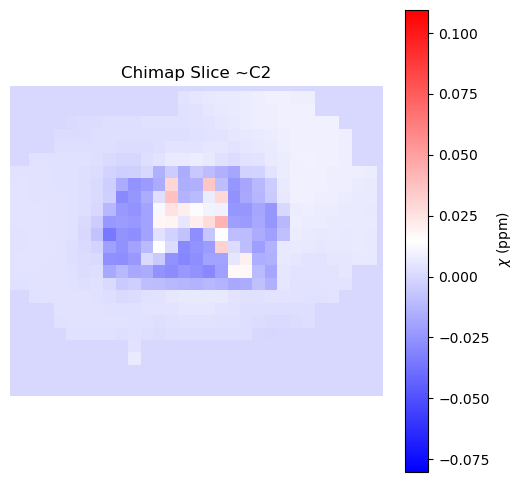

GM Mean: 0.0125 ppm
WM Mean: -0.0158 ppm


In [18]:
utils.qsm_testing_display_slices.display_qsm_slice(initial_iLSQR_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

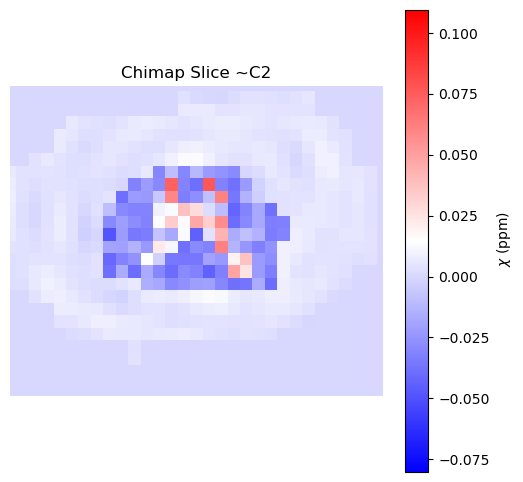

GM Mean: 0.0244 ppm
WM Mean: -0.0255 ppm


In [20]:
utils.qsm_testing_display_slices.display_qsm_slice(best_iLSQR_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

### <span style="color:#1565C0"> NDI Results </span> </br>

In [21]:
initial_NDI_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_NDI\RMSE_in_gt_lf_tst1\NDI_run0\Sepia_Chimap.nii.gz").get_fdata()
best_NDI_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_NDI\RMSE_in_gt_lf_tst1\NDI_run19\Sepia_Chimap.nii.gz").get_fdata()

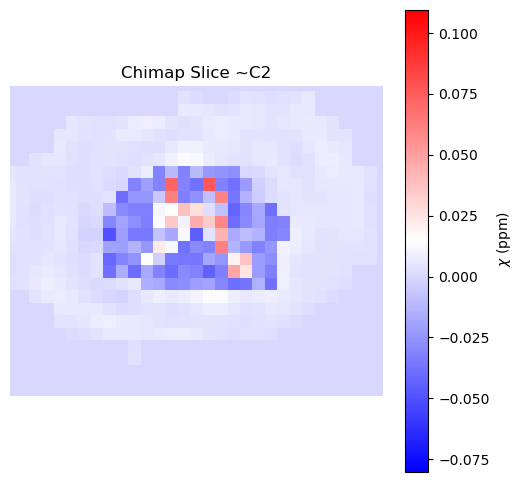

GM Mean: 0.0242 ppm
WM Mean: -0.0253 ppm


In [22]:
utils.qsm_testing_display_slices.display_qsm_slice(initial_NDI_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

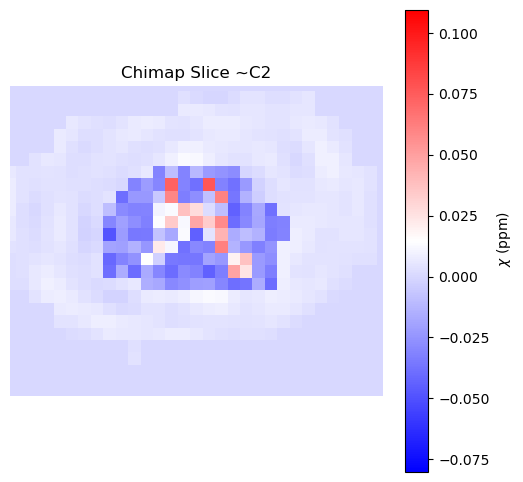

GM Mean: 0.0244 ppm
WM Mean: -0.0255 ppm


In [ ]:
utils.qsm_testing_display_slices.display_qsm_slice(best_NDI_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

### <span style="color:#9575CD"> Star QSM Results </span> </br>

In [34]:
initial_starQSM_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_StarQSM\RMSE_in_gt_lf_tst1\star_QSM_run1\Sepia_Chimap.nii.gz").get_fdata()
best_starQSM_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_StarQSM\RMSE_in_gt_lf_tst1\star_QSM_run5\Sepia_Chimap.nii.gz").get_fdata()

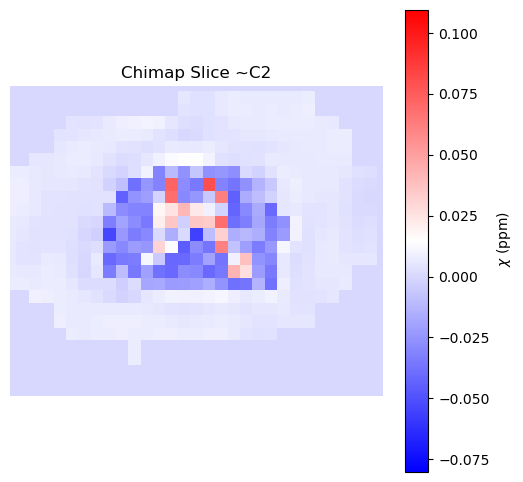

GM Mean: 0.0236 ppm
WM Mean: -0.0256 ppm


In [36]:
utils.qsm_testing_display_slices.display_qsm_slice(initial_starQSM_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

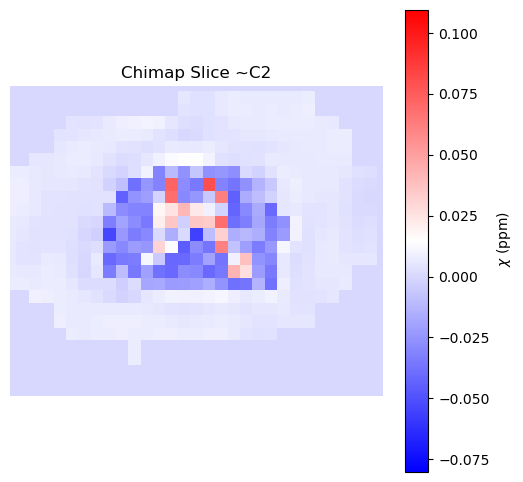

GM Mean: 0.0236 ppm
WM Mean: -0.0256 ppm


In [37]:
utils.qsm_testing_display_slices.display_qsm_slice(best_starQSM_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

### <span style="color:#CE93D8"> FANSI Results </span> </br>


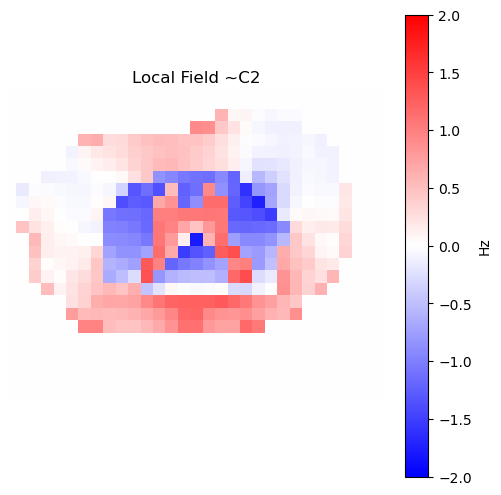

### <span style="color:#8D6E63"> MEDI Results </span> </br>


In [27]:
# It seems that the MEDI algorithm is getting affected from the magnitudes being in different dynamic ranges
# Lets easily check and demodulate by the max of respective magnitude
invivo_mag_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\hc2_m1_mag.nii.gz").get_fdata()
invivo_sc_mask_data = nib.load(r"E:\msc_data\sc_qsm\swiss_data_mk2\QSM_processing\hc2\m1\custom1_sc_msk.nii.gz").get_fdata()

sim_mag_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\gauss_crop_sim_mag_pro.nii.gz").get_fdata()
sim_msk_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\masks\qsm_processing_msk_crop.nii.gz").get_fdata()

In [28]:
# Calculate the max of the magnitudes
invivo_mag_max = np.max(invivo_mag_data[invivo_sc_mask_data==1])
sim_mag_max = np.max(sim_mag_data[sim_msk_data==1]) 

print("Invivo mag max: ", invivo_mag_max)
print("Sim mag max: ", sim_mag_max) 

Invivo mag max:  123.0
Sim mag max:  15.51011127146439


In [29]:
sim_scaled_mag_data = sim_mag_data * (invivo_mag_max / sim_mag_max)
sim_scaled_mag_img = nib.Nifti1Image(sim_scaled_mag_data, affine=nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\gauss_crop_sim_mag_pro.nii.gz").affine)
nib.save(sim_scaled_mag_img, r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\MEDI_custom_gauss_crop_sim_mag_pro.nii.gz")

In [25]:
initial_MEDI_smv_on_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_MEDI\VNS_on_smv_on_merit_off\RMSE_test1_SMV_on_in_gt_lf\MEDI_run0\Sepia_Chimap.nii.gz").get_fdata()
#best_MEDI_smv_on_data = nib.load(r).get_fdata()

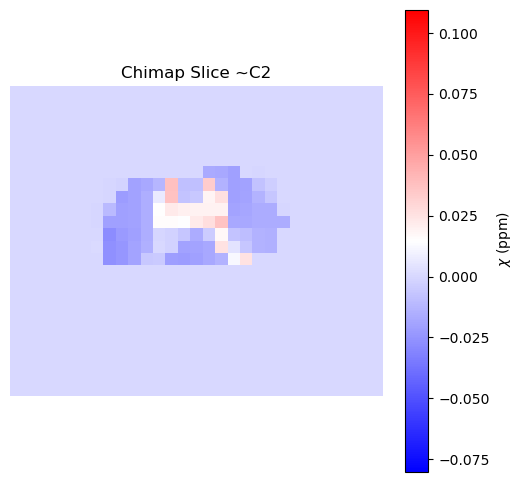

GM Mean: 0.0050 ppm
WM Mean: -0.0053 ppm


In [26]:
utils.qsm_testing_display_slices.display_qsm_slice(initial_MEDI_smv_on_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

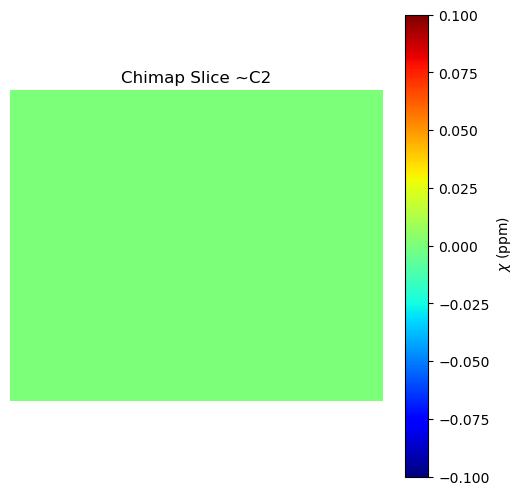

GM Mean: 0.0000 ppm
WM Mean: 0.0000 ppm


In [67]:
utils.qsm_testing_display_slices.display_qsm_slice(best_MEDI_smv_on_data, img_class="sim_ideal", slice_index=32, cmap_min=np.min(best_MEDI_smv_on_data), cmap_max=np.min(best_MEDI_smv_on_data))

In [64]:
np.min(best_MEDI_smv_off_test1_data)

np.float64(-3.257376945953183e-08)

In [65]:
np.max(best_MEDI_smv_off_test1_data)

np.float64(3.1864612282106464e-08)

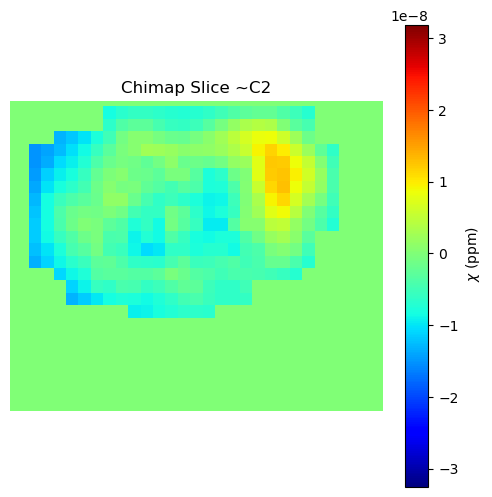

GM Mean: -0.0000 ppm
WM Mean: 0.0000 ppm


In [66]:
utils.qsm_testing_display_slices.display_qsm_slice(best_MEDI_smv_off_test1_data, img_class="sim_ideal", slice_index=29, cmap_min= np.min(best_MEDI_smv_off_test1_data), cmap_max=np.max(best_MEDI_smv_off_test1_data))

In [ ]:
initial_MEDI_smv_off_data = nib.load(r"").get_fdata()
best_MEDI_smv_off_data = nib.load(r"").get_fdata()

### <span style="color:#00897B"> MRI Suscep. Calc. Results </span> </br>

In [38]:
initial_kspace_div_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_MRI_suscep_calc\RMSE_trunc_kspace_div_tst1\mri_suscep_calc_run0\Sepia_Chimap.nii.gz").get_fdata()
best_kspace_div_data = nib.load(r"E:\msc_data\sc_qsm\final_gauss_sims\July_2025\mrsim_outputs\custom_params\sus_mapping_opt\iter_MRI_suscep_calc\RMSE_trunc_kspace_div_tst2\mri_suscep_calc_run59\Sepia_Chimap.nii.gz").get_fdata()

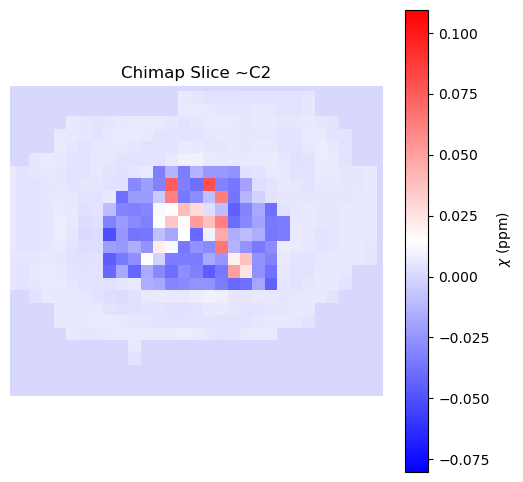

GM Mean: 0.0258 ppm
WM Mean: -0.0269 ppm


In [39]:
utils.qsm_testing_display_slices.display_qsm_slice(initial_kspace_div_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

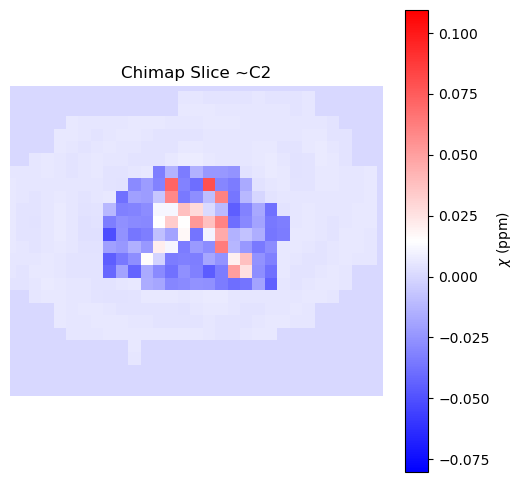

GM Mean: 0.0258 ppm
WM Mean: -0.0268 ppm


In [40]:
utils.qsm_testing_display_slices.display_qsm_slice(best_kspace_div_data, img_class="sim_ideal", slice_index=32, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)

### <span style="color:#F06292"> LPCNN / xQSM / QSMnet+ Results </span> </br> 
Trying to run this 3 algos that don't have parameters but we can still compare to the default version

 </br>
 Examples of running the pipeline but with default versions of the algorithms
 

In [68]:
# First using PDF for BGFR in default mode and then using NDI in default for dipole inverision
default_comparison_chimap_data1 = nib.load(r"E:\msc_data\sc_qsm\new_gauss_sims\mrsim_outpus\cropped_ideal\dipole_inversion_tests\manual_configs\bad_chimaps_for_comp\using_def_PDF_and_NDI/Sepia_Chimap.nii.gz").get_fdata()

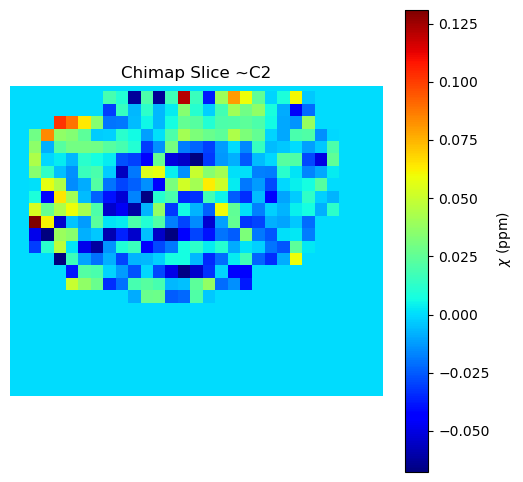

GM Mean: 0.0204 ppm
WM Mean: -0.0260 ppm


: 

In [ ]:
utils.qsm_testing_display_slices.display_qsm_slice(default_comparison_chimap_data1, img_class="sim_ideal", slice_index=29, cmap_min=chimap_avg_sc_min, cmap_max=chimap_avg_sc_max)